In [1]:
from qiskit import *

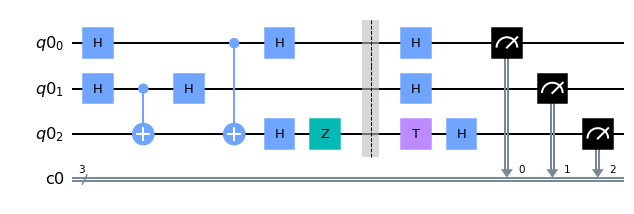

In [2]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
circuit = QuantumCircuit(qr, cr)
%matplotlib inline
circuit.h(qr[0])
circuit.h(qr[1])
circuit.cx(qr[1],qr[2])
circuit.h(qr[1])
circuit.cx(qr[0],qr[2])
circuit.h(qr[0])
circuit.h(qr[2])
circuit.z(qr[2])

circuit.barrier(qr)

circuit.t(qr[2])
circuit.h(qr[0])
circuit.h(qr[1])
circuit.h(qr[2])
circuit.measure(qr, cr)
circuit.draw(output='mpl')

In [3]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_athens')
job = execute(circuit, backend=qcomp,shots = 1024)
from qiskit.tools.monitor import job_monitor

In [4]:
job_monitor(job)

Job Status: job has successfully run


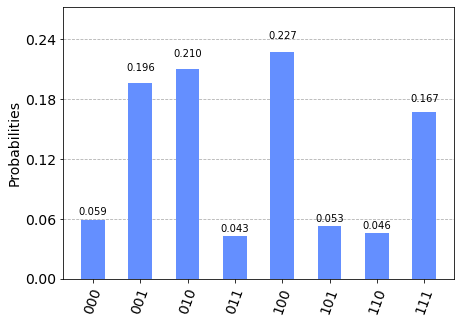

In [5]:
result = job.result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [6]:
print((result.get_counts(circuit)['000']
     +result.get_counts(circuit)['011']
     +result.get_counts(circuit)['101']
     +result.get_counts(circuit)['110']
  
    -(result.get_counts(circuit)['001']
     +result.get_counts(circuit)['010']
     +result.get_counts(circuit)['100']
     +result.get_counts(circuit)['111']
)
      )/1024)

-0.599609375
